# Aufwärmübung

**Inhalt: ** Shapely-Shapes

**Nötige Skills**
- Basic pandas skills

**Lernziele**
- Punkte, Linien, Polygone

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline

## Shapely

Eine Library zur mathematischen Analyse von Formen und für die Geometrie: https://shapely.readthedocs.io/en/stable/

### Point

In [2]:
x1 = 5
y1 = 5

In [3]:
punkt1 = Point(x1, y1)

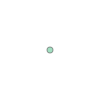

In [4]:
punkt1

### Line

In [5]:
x2a = 20
y2a = 0

x2b = 0
y2b = 20

In [6]:
linie1 = LineString([Point(x2a, y2a), Point(x2b, y2b)])

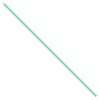

In [7]:
linie1

### Polygon

In [8]:
x3a = 0
y3a = 0

x3b = 10
y3b = 0

x3c = 10
y3c = 10

x3d = 0
y3d = 10

In [11]:
polygon1 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3a, y3d]])
#das polygon verbindet einfach alle punkte, die da angegeben werden, zu einer fläche. 
#das teil kann zig ecken haben, jede form usw

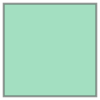

In [12]:
polygon1

### Let's plot it

In [13]:
df = pd.DataFrame({'geometry': [punkt1, linie1]})

In [14]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [15]:
gdf

,geometry
0,POINT (5.00000 5.00000)
1,"LINESTRING (20.00000 0.00000, 0.00000 20.00000)"


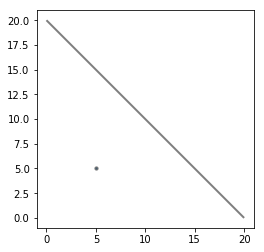

In [22]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

## Your Turn

Wir spielen Picasso und zeichnen ein Haus.

**Aufgabe:** Definieren Sie ein paar Rechtecke, Linien und Punkte...

In [16]:
x4a = 2
y4a = 0

x4b = 8
y4b = 0

x4c = 8
y4c = 7

x4d = 5
y4d = 10

x4e = 2
y4e = 7

In [19]:
polygon2 = Polygon([[x4a, y4a], [x4b, y4b], [x4c, y4c], [x4d, y4d],[x4e, y4e], [x4a, y4d]])

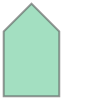

In [20]:
polygon2

In [29]:
x5 = 4
y5 = 2

In [30]:
punkt5 = Point(x5, y5)

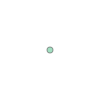

In [31]:
punkt5

In [32]:
df = pd.DataFrame({'geometry': [punkt5, polygon2]})

In [33]:
df

,geometry
0,POINT (4 2)
1,"POLYGON ((2 0, 8 0, 8 7, 5 10, 2 7, 2 0))"


In [34]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

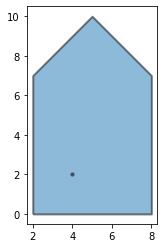

In [35]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

In [50]:
x5kamin = 4
y5kamin = 8

x5kaminoben = 4
y5kaminoben = 10

liniekamin = LineString([Point(x5kamin, y5kamin), Point(x5kaminoben, y5kaminoben)])

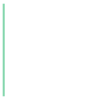

In [51]:
liniekamin

In [52]:
dfhaus = pd.DataFrame({'geometry': [punkt5, polygon2, liniekamin]})

In [53]:
dfhaus

,geometry
0,POINT (4 2)
1,"POLYGON ((2 0, 8 0, 8 7, 5 10, 2 7, 2 0))"
2,"LINESTRING (4 8, 4 10)"


In [56]:
gdfhaus = gpd.GeoDataFrame(dfhaus, geometry='geometry')

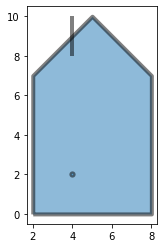

In [58]:
gdfhaus.plot(alpha=0.5, linewidth=4, edgecolor='black', markersize=5)

... fügen Sie die Objekte in ein Geodataframe und plotten Sie dieses!

## Eigenschaften

- Geometrie-Typ

In [59]:
polygon1.geom_type

'Polygon'

- Fläche

In [60]:
polygon1.area

100.0

- Mittelpunkt

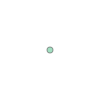

In [61]:
polygon1.centroid

- Rohdaten

In [62]:
polygon1.wkt

'POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))'

## Shapes modifizieren

### Buffer

Praktisch: Erstellt eine "Pufferzone" mit dem Radius x rund um ein Shape

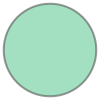

In [63]:
punkt1.buffer(3)

Können wir auch plotten:

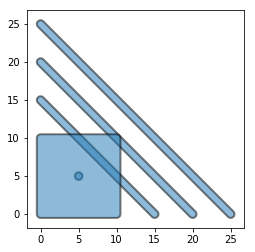

In [30]:
gdf.buffer(0.5).plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

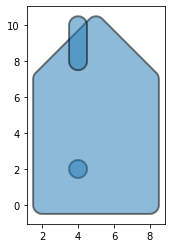

In [64]:
gdfhaus.buffer(0.5).plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

### Union

Auch praktisch: Vereinigt zwei (oder mehr) Shapes zu einer einzigen Shape.

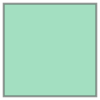

In [75]:
polygon1.union(liniekamin)

Um alle shapes in einem Geodataframe zusammenzufügen: `.unary_union`

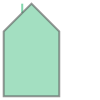

In [76]:
gdfhaus.unary_union #führt die shapes zusammen

Auch hier können wir wieder eine Pufferzone darumlegen...

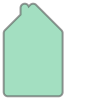

In [77]:
gdfhaus.unary_union.buffer(0.5)

### Difference

Die "Differenz" zwischen zwei Shapes

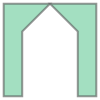

In [69]:
polygon1.difference(polygon2)

### Envelope

Ähnlich wie Buffer - ein Rechteck, das ein Objekt umhüllt

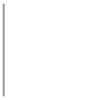

In [73]:
liniekamin.envelope

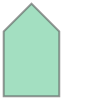

In [74]:
liniekamin.envelope.union(polygon2)